In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, AvgPool2D


2023-01-05 16:41:31.879008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 16:41:32.479661: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-05 16:41:32.479781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-05 16:41:32.479795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
#loading the train file
train_data = np.load('../../data/fashion_test.npy')
test_data = np.load('../../data/fashion_test.npy')

#splitting the labels from the data and changing the labels type
train, train_labels = train_data[:,:-1], train_data[:,-1].astype(np.int32) 
test, test_labels = test_data[:,:-1], test_data[:,-1].astype(np.int32)

In [3]:
# making hotones

train_labels_onehot = tf.keras.utils.to_categorical(train_labels, 5)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, 5)

In [4]:
#normalize the data
train = train.reshape(-1, 28, 28, 1) / 255.0
test = test.reshape(-1, 28, 28, 1) / 255.0


In [5]:
#mapping the classes
mapping = {
    "0" : "T-shirt/top",
    "1" : "Trouser",
    "2" : "Pullover",
    "3" : "Dress",
    "4" : "shirt",
    
}

In [6]:
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), filters=16, kernel_size=3, padding="same", kernel_initializer="he_normal"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=120, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=84, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation="softmax"))
model.summary()

2023-01-05 16:41:33.256439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 32)         128       
 ormalization)                                                   
                                                        

2023-01-05 16:41:33.283443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-05 16:41:33.283743: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-05 16:41:33.284607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 16:41:33.286072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

In [7]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
fit_model = model.fit(train, train_labels_onehot, validation_split=0.3, epochs=100, batch_size=128)

Epoch 1/100


2023-01-05 16:41:35.935896: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-01-05 16:41:36.651467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-01-05 16:41:37.509231: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f4ff09fe6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-05 16:41:37.509272: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2023-01-05 16:41:37.513864: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-05 16:41:37.804427: I tensorflow/compiler/jit/xla_compilation_cache.cc:477]

28/28 [==============================] - 7s 24ms/step - loss: 1.1991 - accuracy: 0.5537 - val_loss: 1.2389 - val_accuracy: 0.6580
Epoch 2/100
28/28 [==============================] - 0s 14ms/step - loss: 0.7483 - accuracy: 0.7123 - val_loss: 1.1572 - val_accuracy: 0.6120
Epoch 3/100
28/28 [==============================] - 0s 15ms/step - loss: 0.6498 - accuracy: 0.7437 - val_loss: 1.0942 - val_accuracy: 0.6073
Epoch 4/100
28/28 [==============================] - 0s 15ms/step - loss: 0.6060 - accuracy: 0.7660 - val_loss: 0.9595 - val_accuracy: 0.6547
Epoch 5/100
28/28 [==============================] - 0s 15ms/step - loss: 0.5580 - accuracy: 0.7860 - val_loss: 0.8701 - val_accuracy: 0.6560
Epoch 6/100
28/28 [==============================] - 0s 15ms/step - loss: 0.5352 - accuracy: 0.7997 - val_loss: 0.8077 - val_accuracy: 0.7060
Epoch 7/100
28/28 [==============================] - 0s 14ms/step - loss: 0.5129 - accuracy: 0.8057 - val_loss: 0.7654 - val_accuracy: 0.7113
Epoch 8/100
28/28 

28/28 [==============================] - 0s 14ms/step - loss: 0.1650 - accuracy: 0.9371 - val_loss: 0.5468 - val_accuracy: 0.8480
Epoch 59/100
28/28 [==============================] - 0s 14ms/step - loss: 0.1585 - accuracy: 0.9346 - val_loss: 0.4872 - val_accuracy: 0.8647
Epoch 60/100
28/28 [==============================] - 0s 13ms/step - loss: 0.1416 - accuracy: 0.9491 - val_loss: 0.5369 - val_accuracy: 0.8480
Epoch 61/100
28/28 [==============================] - 0s 15ms/step - loss: 0.1464 - accuracy: 0.9446 - val_loss: 0.4548 - val_accuracy: 0.8713
Epoch 62/100
28/28 [==============================] - 0s 14ms/step - loss: 0.1390 - accuracy: 0.9457 - val_loss: 0.5032 - val_accuracy: 0.8553
Epoch 63/100
28/28 [==============================] - 0s 13ms/step - loss: 0.1381 - accuracy: 0.9511 - val_loss: 0.4914 - val_accuracy: 0.8587
Epoch 64/100
28/28 [==============================] - 0s 14ms/step - loss: 0.1485 - accuracy: 0.9403 - val_loss: 0.4990 - val_accuracy: 0.8587
Epoch 65/100

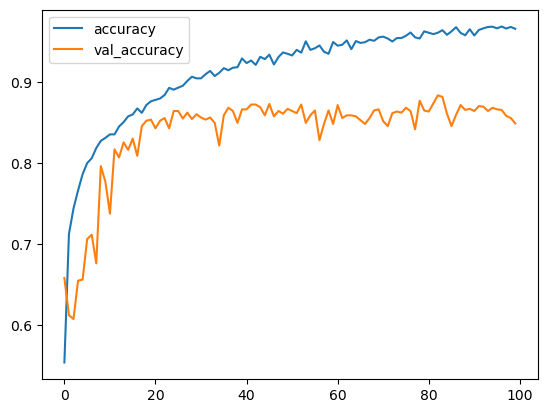

In [9]:
# Plot training and validation accuracy
plt.plot(fit_model.history['accuracy'], label='accuracy')
plt.plot(fit_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

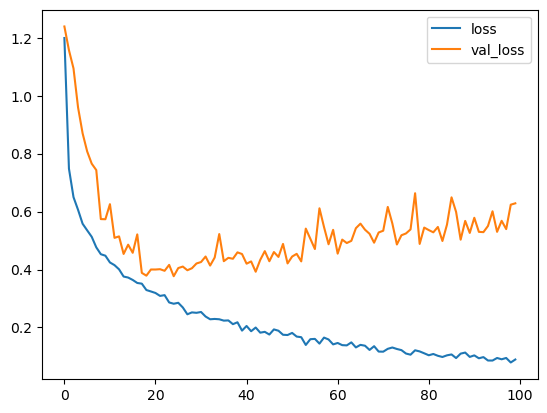

In [10]:
# Plot training and validation loss
plt.plot(fit_model.history['loss'], label='loss')
plt.plot(fit_model.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [11]:
test_model = model.evaluate(test, test_labels_onehot, verbose=1)

157/157 [==============================] - 1s 6ms/step - loss: 0.2063 - accuracy: 0.9498


In [12]:
print("On Test Data:")
print(model.metrics_names[0] + " = {}".format(test_model[0]))
print(model.metrics_names[1] + " = {}".format(test_model[1]))

On Test Data:
loss = 0.2063060849905014
accuracy = 0.9498000144958496


1/1 [==============================] - 0s 123ms/step
Predicted as T-shirt/top


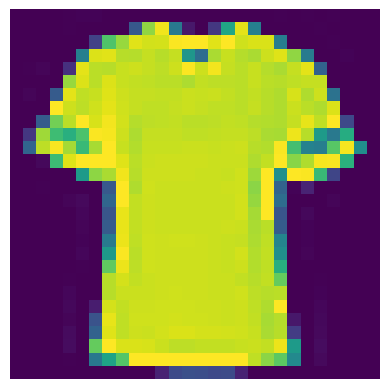

<Figure size 2800x2800 with 0 Axes>

In [13]:
plt.imshow(test[1].reshape(28,28))
plt.axis('off')
plt.figure(figsize=(28,28))
class_val = np.argmax(model.predict(test[1].reshape(-1,28,28,1)))
print("Predicted as {}".format(mapping[str(class_val)]))

In [14]:
probas = model.predict(test)
preds = np.argmax(probas, axis=1)

157/157 [==============================] - 0s 3ms/step


0.9498
0.99537565
(0.9523086845116294, 0.9498, 0.9500665111062314, None)


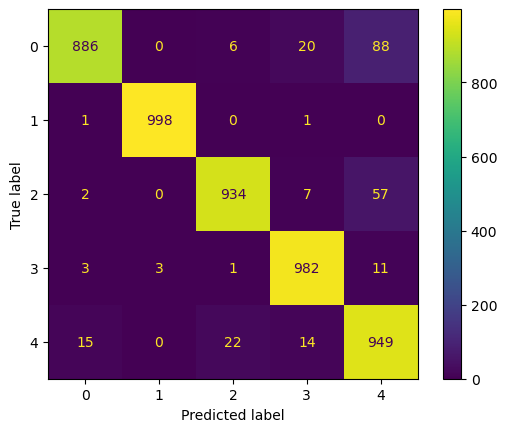

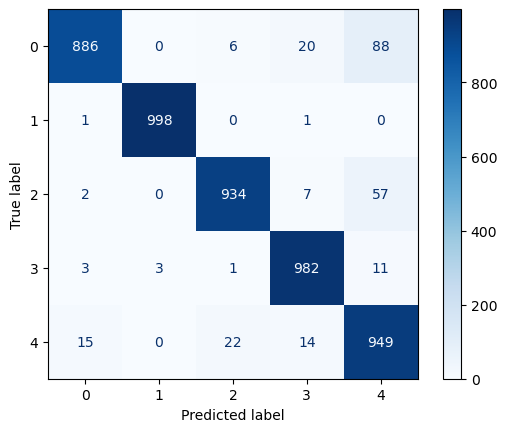

In [17]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    test_labels,
    preds,
    labels=(0, 1, 2, 3, 4),
    display_labels=(0, 1, 2, 3, 4),
)
disp.plot(cmap="Blues")
plt.savefig("figures/confusion_matrix_cnn.png", dpi=400)
print(accuracy_score(test_labels, preds))
print(roc_auc_score(test_labels, probas, multi_class="ovo"))
print(precision_recall_fscore_support(test_labels, preds, average="macro"))